In [1]:
import itertools
import pandas as pd
import numpy as np
import os
import json
import networkx as nx
import string
import pygraphviz
from networkx.readwrite import json_graph
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
import networkx as nx
import string
import pygraphviz
from networkx.readwrite import json_graph
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

## Load precomputed dataframes from CSV

In [2]:
directory_in_str = "saved_csv/glove-wiki-gigaword-300/"

# Distance matrix by decade
decades_dir = "decades/"
decades_dist = []
directory = os.fsencode(directory_in_str+decades_dir)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith('.CSV') or filename.endswith('.csv'):
        decades_dist.append(pd.read_csv(directory_in_str+decades_dir+filename, index_col=0))

# Distance matrix by type of treaty
types_dir = "types/"
types_dist = []
directory = os.fsencode(directory_in_str+types_dir)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith('.CSV') or filename.endswith('.csv'):
        types_dist.append(pd.read_csv(directory_in_str+types_dir+filename, index_col=0))

# Distance matrix between all treaties
total_dir = "total/"
total_dist_df = pd.read_csv(directory_in_str+total_dir+"total_dist_df.csv", index_col=0)

# Dataframe containing metadata from treaties
meta_dir = "saved_csv/meta/"
meta_df = pd.read_csv(meta_dir+"meta.csv", index_col=0)

text_df_dir = "saved_csv/glove-wiki-gigaword-300/"
text_df = pd.read_csv(text_df_dir+"text_df.csv", index_col=0)

## Graphs

Force directed
+ Based on this: https://stackoverflow.com/questions/13513455/drawing-a-graph-or-a-network-from-a-distance-matrix
+ Uses NEATO for finding the layout of nodes https://www.graphviz.org/pdf/neatoguide.pdf

### Distances between all treaties

Connect pairs of nodes by 'date_signed' order

In [3]:
# get 'id' from filename and make it the index to the 'meta' dataframe
id_list = []
for item in meta_df.file:
    id_list.append(item.split('.')[0][4:])
meta_df = meta_df.drop(['file'], axis=1)
meta_df["id"] = id_list
meta_df = meta_df.set_index(['id'],verify_integrity=True)

In [4]:
# Convert 'date_signed' column to datetime object
meta_df['date_signed'] = pd.to_datetime(meta_df.date_signed)

# Sort items by date
meta_df.sort_values(by='date_signed', inplace=True)

In [91]:
# We want to connect nodes in order by which the treaties where signed(date)
x = list(range((len(text_df.index.values))))
id_list = list(text_df.index.values)
id2_list = []
for i in x:
    id2_list.append(int((i + 1) / 2))

index_pairs = []
for i in id2_list[:-1]:
    index_pairs.append(id_list[i])
index_pairs = [index_pairs[i:i+2] for i in range(0,len(index_pairs),2)]

Color nodes by treaty type

In [6]:
# Visualization directory output
out_dir_vis = "vis/glove-wiki-gigaword-300/total/"

## Distance graphs

### by decade

In [7]:
# Get list of colors by type of treaty
type_unique = text_df.type.unique()
type_0 = text_df[text_df.type.isin([type_unique[0]])].index.values  # Customs Union
type_1 = text_df[text_df.type.isin([type_unique[1]])].index.values # Free Trade Agreement
type_2 = text_df[text_df.type.isin([type_unique[2]])].index.values # Customs Union & Economic Integration Agreement
type_3 = text_df[text_df.type.isin([type_unique[3]])].index.values # Free Trade Agreement & Economic Integration Agreement
type_4 = text_df[text_df.type.isin([type_unique[4]])].index.values # Partial Scope Agreement
type_5 = text_df[text_df.type.isin([type_unique[5]])].index.values # Economic Integration Agreement

In [16]:
file_out = "total_dist_colors.svg"

In [8]:
dt = [('len', float)]
A = (total_dist_df.values*40)
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),list(total_dist_df.columns.values))))  #Rename node to treaty id
G = nx.drawing.nx_agraph.to_agraph(G) # Create pygraphviz

In [9]:
G.node_attr.update(fillcolor="transparent", shape="circle", style="filled", width="0.5")
G.edge_attr.update(color="transparent", width="10.0", len="10")
G.graph_attr.update(size="10")

In [18]:
for node in G.iternodes():
    if int(node) in type_0:
        node.attr['fillcolor']= 'royalblue'
    if int(node) in type_1:
        node.attr['fillcolor']= 'orangered'
    if int(node) in type_2:
        node.attr['fillcolor']= 'goldenrod1'
    if int(node) in type_3:
        node.attr['fillcolor']= 'darkturquoise'
    if int(node) in type_4:
        node.attr['fillcolor']= 'springgreen3'
    if int(node) in type_5:
        node.attr['fillcolor']= 'thistle'

/Users/estebanserranorodriguez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: generator 'AGraph.nodes_iter' raised StopIteration
  """Entry point for launching an IPython kernel.


In [14]:
#for item in index_pairs[:-1]:
#    G.add_edge(str(item[0]), str(item[1]),color='green')

In [19]:
G.draw(out_dir_vis + file_out, format='svg', prog='neato')

### Distance by type

In [20]:
file_out = "by_type_"

In [37]:
for n,item in enumerate(types_dist):
    dt = [('len', float)]
    A = (item.values*40)
    A = A.view(dt)

    G = nx.from_numpy_matrix(A)
    G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),list(item.columns.values))))  #Rename node to treaty id
    G = nx.drawing.nx_agraph.to_agraph(G) # Create pygraphviz
    
    G.node_attr.update(fillcolor="transparent", shape="circle", style="filled", width="0.5")
    G.edge_attr.update(color="transparent", width="10.0", len="10")
    G.graph_attr.update(size="10")
    
    for node in G.iternodes():
        if int(node) in type_0:
            node.attr['fillcolor']= 'royalblue'
        elif int(node) in type_1:
            node.attr['fillcolor']= 'orangered'
        elif int(node) in type_2:
            node.attr['fillcolor']= 'goldenrod1'
        elif int(node) in type_3:
            node.attr['fillcolor']= 'darkturquoise'
        elif int(node) in type_4:
            node.attr['fillcolor']= 'springgreen3'
        elif int(node) in type_5:
            node.attr['fillcolor']= 'thistle'
    
    G.draw(out_dir_vis + file_out + str(n) + '.svg', format='svg', prog='neato')

/Users/estebanserranorodriguez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: generator 'AGraph.nodes_iter' raised StopIteration
  


### Linear distance ordered by time

In [136]:
meta_df.date_signed.loc['310'].strftime('%Y-%m-%d')

'1948-12-06'

In [170]:
ordered_dist = []
dates = []
for n,i in enumerate(index_pairs[:-1]):
#    print(f'{n}f: {i[0]} to: {i[1]}')
    ordered_dist.append(total_dist_df.loc[int(i[0])][str(i[1])])
    dates.append(meta_df.date_signed.loc[str(i[0])].strftime('%Y-%m-%d'))

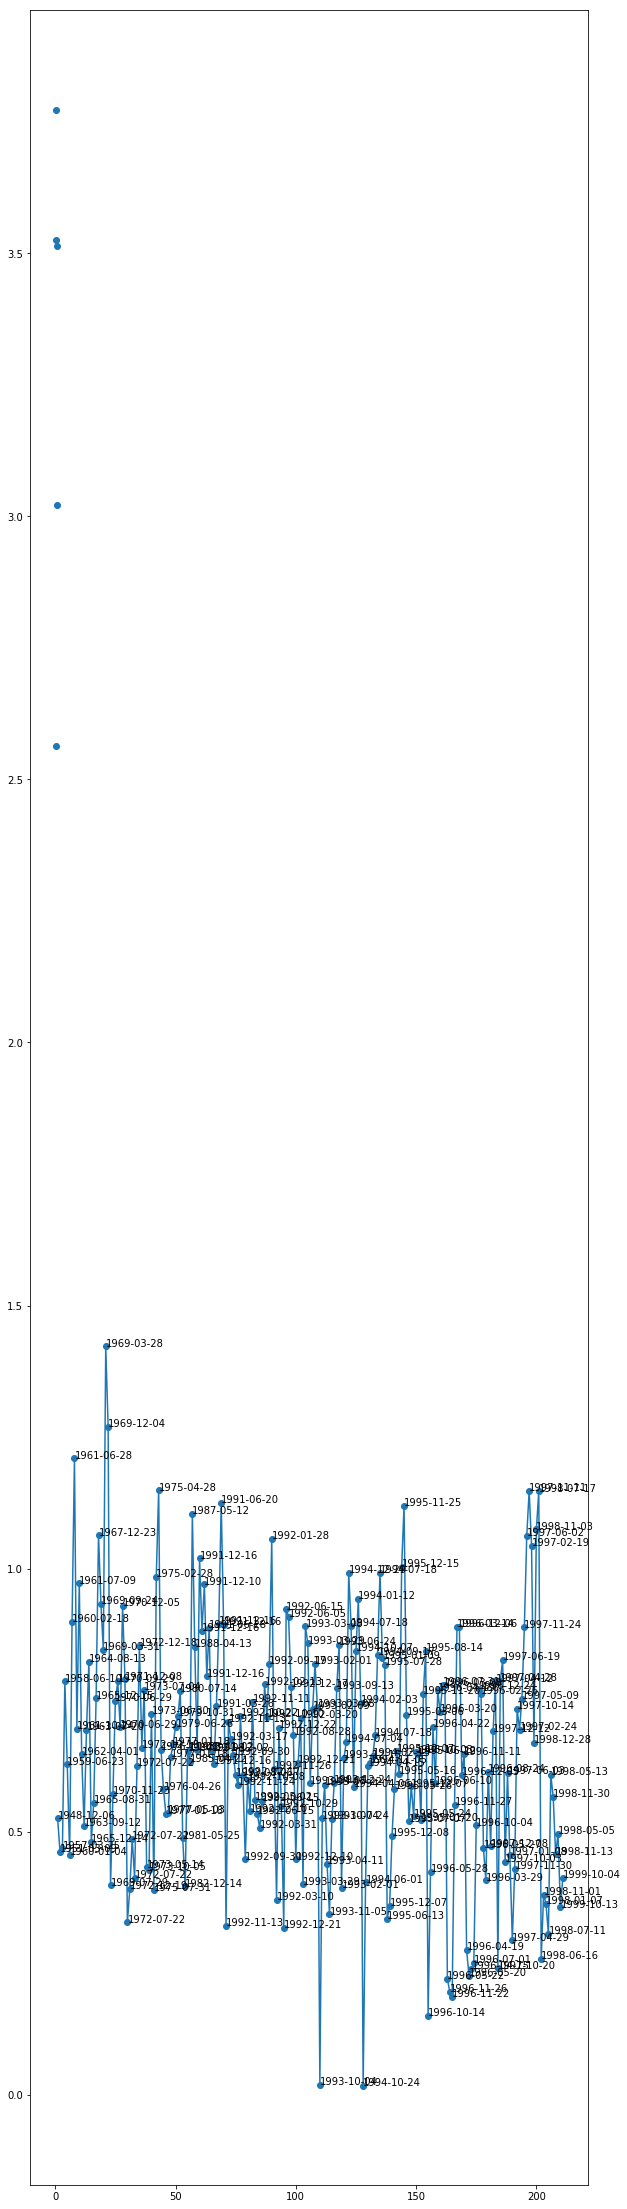

In [176]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = ['58', 651, 393, 203, 123]

fig, ax = plt.subplots(figsize=(10, 40))
ax.scatter(z, y)

for i, txt in enumerate(dates):
    ax.annotate(txt, (zeros[i], ordered_dist[i]))
plt.plot(zeros,ordered_dist,'-o')
plt.savefig(out_dir_vis+'date'+"_plots.svg", dpi=150)